# Association Rule

In [1]:

#Import Libraries
import teradata
import pandas as pd
import numpy as np
# pip install mlxtend 
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt
import networkx as nx  

In [2]:
#Machine Learning with the Apriori Algorithm
#Author: Kyle Rocha 


#Connect to Teradata 
udaExec = teradata.UdaExec (appName="Teradata_Test", version="1.0",
        logConsole=False)

session = udaExec.connect(method="odbc", system="tqdpr02",
        username="elt_usr", password="elt_usr##")

#Load the transactional data into a Pandas dataframe  
query = """
    select
    a.txn_id,
    c.class_id as PROD_ID
    
    from      
    dw_dss.txn_FACTS          a
    ,dw_dss.lu_day_merge      b
    ,dw_dss.lu_upc            c 
    
    where   
    a.store_id = 0710
    and a.upc_id                              = c.upc_id
    and a.txn_dte                             = b.d_date
    and b.week_id                            between 201819 and 201822
    and a.upc_id not = 67270610708
    and c.upc_dsc not = 'UNKNOWN'
    and c.class_id not = 758501
    
    and group_id <99            
    group   by 1,2
    """

In [3]:
df_transactions_2018 = pd.read_sql(query,session) 

In [4]:
df_transactions_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365317 entries, 0 to 365316
Data columns (total 2 columns):
TXN_ID     365317 non-null float64
PROD_ID    365317 non-null float64
dtypes: float64(2)
memory usage: 5.6 MB


In [4]:
df_transactions_2018['TXN_ID']= df_transactions_2018['TXN_ID'].astype(np.int64)
df_transactions_2018['PROD_ID']= df_transactions_2018['PROD_ID'].astype(np.int64)

In [14]:
df_transactions_2018['PROD_ID']= df_transactions_2018['PROD_ID'].astype(np.int64)

In [5]:
#pd.set_option('display.float_format',lambda X:'%'%X)

In [15]:
df_transactions_2018.head()

,TXN_ID,PROD_ID
0,5425071002253,823110
1,5425071002253,841502
2,5425071002253,846905
3,5425071002253,846912
4,5425071002253,890510


In [19]:
srt_df_basket_2018= df_basket_2018.sort_values(by= 'TXN_ID')

In [20]:
srt_df_basket_2018.head()

,TXN_ID,PROD_ID
0,5.425071e+12,"[823110.0, 841502.0, 846905.0, 846912.0, 89051..."
1,5.426071e+12,[80130.0]
2,5.426071e+12,[33505.0]
3,5.426071e+12,"[90105.0, 340110.0, 363501.0, 364510.0, 820610..."
4,5.426071e+12,"[32001.0, 240501.0, 242001.0, 297001.0, 360105..."


In [5]:
#Manipulate the transaction dataframe into a basket dataframe, reset index
df_basket_2018 = df_transactions_2018.groupby('TXN_ID').PROD_ID.apply(list).reset_index()# type: pandas.core.frame.DataFrame



In [4]:
tnx_id_df_basket_2018=df_basket_2018(columns = ['TNX_ID']) #NW: 'DataFrame' object is not callable

NameError: name 'df_basket_2018' is not defined

In [28]:
tnx_id_df_basket_2018=df_basket_2018['TNX_ID']

KeyError: 'TNX_ID'

In [17]:
df_basket_2018.head(15)

,TXN_ID,PROD_ID
0,5425071002253,"[823110, 841502, 846905, 846912, 890510, 961505]"
1,5426071000000,[80130]
2,5426071000002,[33505]
3,5426071000015,"[90105, 340110, 363501, 364510, 820610, 881001..."
4,5426071000019,"[32001, 240501, 242001, 297001, 360105, 364005..."
5,5426071000021,"[32515, 370201, 372501, 840601, 841300, 841401..."
6,5426071000022,"[10110, 363010, 364510, 394010, 470501, 473501]"
7,5426071000023,[60101]
8,5426071000024,"[846510, 846905]"
9,5426071000030,[890115]


In [ ]:
df_basket_2018.PROD_ID.items

In [6]:
te = TransactionEncoder()  # type: mlxtend.preprocessing.transactionencoder.TransactionEncoder
dset = df_basket_2018.PROD_ID.values  # numpy.ndarray; List for prod_id for every tnx_id

In [19]:
print(dset)

[list([823110, 841502, 846905, 846912, 890510, 961505]) list([80130])
 list([33505]) ...
 list([210115, 211010, 215505, 252510, 283501, 300215, 362501, 363020, 840219, 840601, 844505, 845001, 845701, 846501, 846905, 847012, 847131, 847141, 847142, 847149, 848001, 848106, 848107, 881002, 885625])
 list([31001, 32010, 297001, 298501, 370605, 383501, 420110, 432001, 461001, 461005, 840401, 844902, 846905, 885625, 885920])
 list([80135, 80145, 251005, 290110])]


In [22]:
len(dset)

52317

In [8]:
#type(df_basket_2018)
df_basket_2018.shape

(52317, 2)

In [8]:
te_ary = te.fit(dset).transform(dset, sparse=True) # type: scipy.sparse.csr.csr_matrix



In [24]:
te.columns_   #type: list with length 2251

[10100,
 10101,
 10105,
 10110,
 10115,
 10120,
 10500,
 10501,
 10505,
 10510,
 10515,
 10520,
 11025,
 11515,
 11520,
 12015,
 12500,
 12515,
 20100,
 20105,
 20110,
 20115,
 20120,
 20200,
 20205,
 20210,
 20220,
 20405,
 20410,
 20415,
 21005,
 21010,
 21505,
 21510,
 31001,
 31010,
 32001,
 32005,
 32010,
 32510,
 32515,
 32520,
 32540,
 32545,
 33000,
 33001,
 33005,
 33010,
 33501,
 33505,
 33510,
 33515,
 33525,
 33535,
 33545,
 40101,
 40105,
 40110,
 40500,
 40501,
 40505,
 40510,
 40515,
 41000,
 41001,
 41005,
 41010,
 41015,
 41020,
 50101,
 50105,
 50110,
 50500,
 50501,
 50505,
 50510,
 50515,
 51001,
 51005,
 51010,
 52000,
 52001,
 52005,
 52010,
 52501,
 52505,
 52510,
 52515,
 52520,
 52525,
 53000,
 53001,
 53005,
 53010,
 53015,
 53020,
 53501,
 53505,
 53585,
 54000,
 54001,
 54005,
 54010,
 54015,
 54020,
 54025,
 54085,
 54500,
 54501,
 54505,
 54510,
 54515,
 58500,
 58501,
 58505,
 60101,
 60102,
 60201,
 60202,
 60300,
 60400,
 60401,
 60405,
 60410,
 60500,


In [24]:
w_prod_id = list(filter(lambda x : x == 823110, te.columns_))

In [29]:
len(te.columns_)

2251

In [25]:
 list(filter(lambda x : x == 823110, te.columns_))

[823110.0]

In [16]:
type(te_ary)

scipy.sparse.csr.csr_matrix

In [28]:
print(te_ary)

  (0, 1906)	True
  (0, 2226)	True
  (0, 1748)	True
  (0, 2147)	True
  (0, 1904)	True
  (0, 1796)	True
  (1, 163)	True
  (2, 49)	True
  (3, 1738)	True
  (3, 2086)	True
  (3, 2069)	True
  (3, 791)	True
  (3, 744)	True
  (3, 178)	True
  (3, 2071)	True
  (3, 796)	True
  (4, 36)	True
  (4, 794)	True
  (4, 907)	True
  (4, 2203)	True
  (4, 758)	True
  (4, 645)	True
  (4, 908)	True
  (4, 1851)	True
  (4, 909)	True
  :	:
  (52314, 552)	True
  (52314, 1966)	True
  (52314, 1967)	True
  (52314, 2070)	True
  (52314, 623)	True
  (52314, 2100)	True
  (52315, 2109)	True
  (52315, 869)	True
  (52315, 654)	True
  (52315, 1872)	True
  (52315, 645)	True
  (52315, 38)	True
  (52315, 887)	True
  (52315, 802)	True
  (52315, 829)	True
  (52315, 858)	True
  (52315, 888)	True
  (52315, 1765)	True
  (52315, 34)	True
  (52315, 2100)	True
  (52315, 1904)	True
  (52316, 166)	True
  (52316, 543)	True
  (52316, 634)	True
  (52316, 164)	True


In [20]:
type(te.columns_)

list

In [9]:
StringCols = [str(i) for i in te.columns_]  #type = list

In [18]:
print (StringCols)

['10100.0', '10101.0', '10105.0', '10110.0', '10115.0', '10120.0', '10500.0', '10501.0', '10505.0', '10510.0', '10515.0', '10520.0', '11025.0', '11515.0', '11520.0', '12015.0', '12500.0', '12515.0', '20100.0', '20105.0', '20110.0', '20115.0', '20120.0', '20200.0', '20205.0', '20210.0', '20220.0', '20405.0', '20410.0', '20415.0', '21005.0', '21010.0', '21505.0', '21510.0', '31001.0', '31010.0', '32001.0', '32005.0', '32010.0', '32510.0', '32515.0', '32520.0', '32540.0', '32545.0', '33000.0', '33001.0', '33005.0', '33010.0', '33501.0', '33505.0', '33510.0', '33515.0', '33525.0', '33535.0', '33545.0', '40101.0', '40105.0', '40110.0', '40500.0', '40501.0', '40505.0', '40510.0', '40515.0', '41000.0', '41001.0', '41005.0', '41010.0', '41015.0', '41020.0', '50101.0', '50105.0', '50110.0', '50500.0', '50501.0', '50505.0', '50510.0', '50515.0', '51001.0', '51005.0', '51010.0', '52000.0', '52001.0', '52005.0', '52010.0', '52501.0', '52505.0', '52510.0', '52515.0', '52520.0', '52525.0', '53000.0'

In [26]:
type(StringCols)

list

In [27]:
 list(filter(lambda x : x == '823110.0', StringCols))

['823110.0']

In [30]:
aprioriData = pd.SparseDataFrame(te_ary, columns=StringCols, default_fill_value=False) # type: pandas.core.sparse.frame.SparseDataFrame


In [31]:
aprioriData.head() 

,10100.0,10101.0,10105.0,10110.0,10115.0,10120.0,10500.0,10501.0,10505.0,10510.0,...,970535.0,971000.0,971005.0,971015.0,971025.0,971045.0,971501.0,971505.0,971520.0,971535.0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
aprioriData.shape # (52317, 2251): 2251 items for 52317 customers

(52317, 2251)

In [33]:
type(aprioriData)

pandas.core.sparse.frame.SparseDataFrame

In [29]:
Results = apriori(aprioriData, min_support=0.001, use_colnames=True, verbose=0) # type: pandas.core.frame.DataFrame

NameError: name 'aprioriData' is not defined

In [36]:
Results.head()  # column: support, itemsets (object)

,support,itemsets
0,0.010780,(10101.0)
1,0.026798,(10105.0)
2,0.026225,(10110.0)
3,0.024237,(10510.0)
4,0.015655,(10515.0)


In [37]:
Results.info

<bound method DataFrame.info of       support              itemsets
0    0.010780             (10101.0)
1    0.026798             (10105.0)
2    0.026225             (10110.0)
3    0.024237             (10510.0)
4    0.015655             (10515.0)
5    0.010436             (20105.0)
6    0.033240             (20110.0)
7    0.055947             (20210.0)
8    0.037330             (31001.0)
9    0.010188             (31010.0)
10   0.023740             (32001.0)
11   0.085651             (32005.0)
12   0.035457             (32010.0)
13   0.010991             (32540.0)
14   0.030181             (33001.0)
15   0.010991             (33501.0)
16   0.013743             (60101.0)
17   0.015674             (60401.0)
18   0.010933             (72001.0)
19   0.013476             (80101.0)
20   0.030181             (80105.0)
21   0.026167             (80130.0)
22   0.028366             (80140.0)
23   0.016782             (80510.0)
24   0.011583             (90100.0)
25   0.066804             (90101

In [38]:
Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
support     215 non-null float64
itemsets    215 non-null object
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [39]:
#Generate association rules from frequent itemsets using a minimum confidence or lift threshold
rules = association_rules(Results, metric="lift", min_threshold=1)# type: pandas.core.frame.DataFrame

In [41]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20210.0),(840601.0),0.055947,0.126536,0.014756,0.263751,2.084392,0.007677,1.186370
1,(840601.0),(20210.0),0.126536,0.055947,0.014756,0.116616,2.084392,0.007677,1.068678
2,(90101.0),(32005.0),0.066804,0.085651,0.010131,0.151645,1.770503,0.004409,1.077791
3,(32005.0),(90101.0),0.085651,0.066804,0.010131,0.118277,1.770503,0.004409,1.058378
4,(32005.0),(840601.0),0.085651,0.126536,0.015731,0.183664,1.451476,0.004893,1.069981


In [42]:
#Add store number to rules dataframe 
rules['store_id'] = '710'


In [43]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,store_id
0,(20210.0),(840601.0),0.055947,0.126536,0.014756,0.263751,2.084392,0.007677,1.186370,710
1,(840601.0),(20210.0),0.126536,0.055947,0.014756,0.116616,2.084392,0.007677,1.068678,710
2,(90101.0),(32005.0),0.066804,0.085651,0.010131,0.151645,1.770503,0.004409,1.077791,710
3,(32005.0),(90101.0),0.085651,0.066804,0.010131,0.118277,1.770503,0.004409,1.058378,710
4,(32005.0),(840601.0),0.085651,0.126536,0.015731,0.183664,1.451476,0.004893,1.069981,710


In [44]:
support = rules.as_matrix(columns=['support']) #type: numpy.ndarray


C:\Users\syue003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [47]:
print(support)

[[0.0147562 ]
 [0.0147562 ]
 [0.01013055]
 [0.01013055]
 [0.01573102]
 [0.01573102]
 [0.01131563]
 [0.01131563]
 [0.01322706]
 [0.01322706]
 [0.01267274]
 [0.01267274]
 [0.01083778]
 [0.01083778]
 [0.01206109]
 [0.01206109]
 [0.01429746]
 [0.01429746]
 [0.01125829]
 [0.01125829]
 [0.01062752]
 [0.01062752]
 [0.01039815]
 [0.01039815]
 [0.01624711]
 [0.01624711]
 [0.0119464 ]
 [0.0119464 ]
 [0.01001586]
 [0.01001586]
 [0.01016878]
 [0.01016878]
 [0.01131563]
 [0.01131563]
 [0.02068161]
 [0.02068161]
 [0.0190569 ]
 [0.0190569 ]
 [0.01297857]
 [0.01297857]
 [0.013552  ]
 [0.013552  ]
 [0.01009232]
 [0.01009232]
 [0.01120095]
 [0.01120095]
 [0.01479443]
 [0.01479443]
 [0.01020701]
 [0.01020701]
 [0.02018464]
 [0.02018464]
 [0.01165969]
 [0.01165969]
 [0.01116272]
 [0.01116272]
 [0.01202286]
 [0.01202286]
 [0.01127741]
 [0.01127741]]


In [48]:
support = rules.as_matrix(columns=['support'])  # len(support) = 60
confidence = rules.as_matrix(columns=['confidence'])  #  len ('confidence') = 60

import matplotlib.pyplot as plt

C:\Users\syue003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\syue003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [49]:
support_1 = rules.values(columns=['support'])  #NW: TypeError: 'numpy.ndarray' object is not callable



TypeError: 'numpy.ndarray' object is not callable

In [51]:
len(confidence)

60

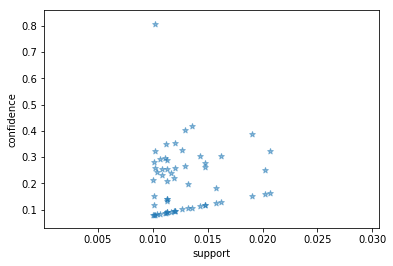

In [52]:
for i in range (len(support)):
   support[i] = support[i] 
   confidence[i] = confidence[i] 
 
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()


In [60]:
#Code for second visualization 

import numpy as np
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
    
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()
  
#draw_graph (rules,10)

 

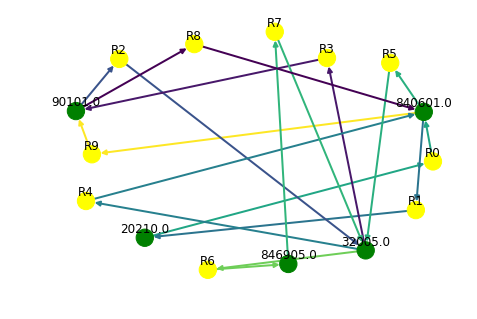

In [61]:
draw_graph (rules,10)

In [54]:

             
            G1.add_nodes_from([c])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

NameError: name 'rules_to_show' is not defined

In [57]:
  import networkx as nx   # networkx.classes.digraph.DiGraph

In [58]:
G1 = nx.DiGraph()

In [59]:
type(G1)

networkx.classes.digraph.DiGraph

In [ ]:
#dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], ['Apple', 'Beer', 'Rice'], ['Apple', 'Beer'], ['Apple', 'Bananas'], ['Milk', 'Beer', 'Rice', 'Chicken'], ['Milk', 'Beer', 'Rice'], ['Milk', 'Beer'], ['Apple', 'Bananas']] 

In [62]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], ['Apple', 'Beer', 'Rice'], ['Apple', 'Beer'], ['Apple', 'Bananas'], ['Milk', 'Beer', 'Rice', 'Chicken']]

In [63]:
type(dataset)

list

In [65]:
w1=   te.fit(dataset)# type:mlxtend.preprocessing.transactionencoder.TransactionEncoder

In [67]:
print(w1)

TransactionEncoder()


In [68]:
type(dataset)

list

In [69]:
te_ary = te.fit(dataset).transform(dataset) # type : numpy.ndarray


In [71]:
te_ary

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True]])

In [74]:
te_ary.astype("int")

array([[1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1]])

In [76]:
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [78]:
first4 = te_ary[:4] 
te.inverse_transform(first4) 

[['Apple', 'Beer', 'Chicken', 'Rice'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas']]